# Analisis Deportivo
## Mejores Prospectos para los Chicago Bulls 2023-24


### Introduccion

Los Chicago Bulls, es una de las franquicias más emblemáticas y exitosas de la NBA, esto debido principalmente a la gran influencia que creó Michael Jordan en la década de los 90's, consiguiendo 6 anillos en 8 años. 
Desde entonces, los Chicago Bulls no han conseguido volver a consolidar un equipo auténticamente competitivo capaz de volver a la cima del Basketball y establecer una hegemonía en la NBA, siendo lo más lejos que llegaron las Semifinales de conferencia del 2005. 
En el siguiente reporte se analiza aspectos básicos del juego de los Chicago Bulls y se tratará de encontrar correlaciones que pueden llevar a los Chicago Bulls a la victoria y a los Play-Off, se compararan con el actual sexto puesto de la NBA, los Brooklyn Nets. 


### Documentación 

El problema de la franquicia es que el equipo no es capaz de llenar las expectativas de los fanáticos, el objetivo del análisis es encontrar cuales son los puntos claves para ganar los partidos, y en cuál de ellos falla los Chicago Bulls para poder decidir qué jugadores podrían ser fichados en el draft para cubrir esas fallas. 
Se ha utilizado un set de datos con todos los partidos desde 2017 con todas las estadísticas de los partidos para poder analizar la mayor cantidad de variables y ver de cuales depende la victoria de un equipo, y otro set de datos con información recolectada sobre los 10 mejores jugadores por posición disponibles para el draft del 2023.


### Modelo

El esquema utilizado es un modelo estrella, no se ha utilizado subdimensiones por la facilidad y al no ser una base de datos extremadamente grande, aumentar la rapidez no es algo realmente necesario utilizando otros modelos más costosos, el diseño planteado es el siguiente:
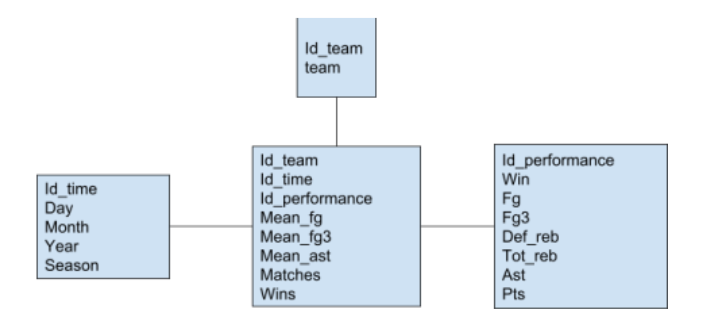

### Codigo

Una vez definido el modelo a utilizar, se procede a crear las dimensiones y buscar las correlaciones con la victoria

#### Se importan las librerias a utilizar y se lee el csv a analizar

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv(r'data/game_scores.csv')

#### Se ven las columnas y los elementos de la tabla

In [2]:
games

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,04/10/2018,2017-18,Hawks,76ers,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,04/08/2018,2017-18,Celtics,Hawks,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,04/06/2018,2017-18,Wizards,Hawks,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,04/04/2018,2017-18,Hawks,Heat,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,04/03/2018,2017-18,Heat,Hawks,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,22200052,10/25/2022,2022-23,Wizards,Pistons,1,0,44,36,...,26,12,7,6,12,13,7,1,120,99
7055,7055,22200992,03/09/2023,2022-23,Pistons,Hornets,0,1,40,43,...,20,24,5,11,19,13,4,9,103,113
7056,7056,22200919,02/27/2023,2022-23,Hornets,Pistons,1,0,43,42,...,24,18,8,12,17,9,3,3,117,106
7057,7057,22200785,02/03/2023,2022-23,Pistons,Hornets,1,0,44,40,...,27,22,7,16,23,14,3,2,118,112


#### Se buscan nulos en la tabla

In [3]:
def isnull_sum(df):
    return df.isnull().sum() > 0
print(f'{isnull_sum(games)}')

Unnamed: 0        False
MATCHID           False
DATE              False
SEASON            False
HOME              False
AWAY              False
W_HOME            False
W_AWAY            False
HOME_FG           False
AWAY_FG           False
HOME_FGA          False
AWAY_FGA          False
HOME_FG_PCT       False
AWAY_FG_PCT       False
HOME_FG3          False
AWAY_FG3          False
HOME_FG3A         False
AWAY_FG3A         False
HOME_FG3_PCT      False
AWAY_FG3_PCT      False
HOME_FT           False
AWAY_FT           False
HOME_FTA          False
AWAY_FTA          False
HOME_FT_PCT       False
AWAY_FT_PCT       False
HOME_OFF_REB      False
AWAY_OFF_REB      False
HOME_DEF_REB      False
AWAY_DEF_REB      False
HOME_TOT_REB      False
AWAY_TOT_REB      False
HOME_AST          False
AWAY_AST          False
HOME_STL          False
AWAY_STL          False
HOME_TURNOVERS    False
AWAY_TURNOVERS    False
HOME_BLK          False
AWAY_BLK          False
HOME_PTS          False
AWAY_PTS        

#### Crear dimension Performance

Para realizar la primera dimensión es necesario separar el set de datos en 2, “Home” y “Away”, esto con el fin de luego unir estas tablas y así tener el performance individual de los equipos únicamente por fecha y no en partidos ya que para este análisis no necesitaremos analizar los rivales directos. 

Se separa de la tabla games la tabla away para las estadisticas de los equipos visitantes y se cambia los nombres en esta para estandarizarla

In [4]:
away = games[['DATE',
              'SEASON',
              'AWAY',
              'W_AWAY',
              'AWAY_FG',
              'AWAY_FGA',
              'AWAY_FG_PCT',
              'AWAY_FG3',
              'AWAY_FG3A',
              'AWAY_FG3_PCT',
              'AWAY_FT',
              'AWAY_FTA',
              'AWAY_FT_PCT',
              'AWAY_OFF_REB',
              'AWAY_DEF_REB',
              'AWAY_TOT_REB',
              'AWAY_AST',
              'AWAY_STL',
              'AWAY_TURNOVERS',
              'AWAY_BLK',
              'AWAY_PTS',
              'HOME_PTS']]

columns = {'AWAY':'TEAM',
           'W_AWAY':'WIN',
           'AWAY_FG':'FG',
           'AWAY_FGA':'FGA',
           'AWAY_FG_PCT':'FG_PCT',
           'AWAY_FG3':'FG3',
           'AWAY_FG3A':'FG3A',
           'AWAY_FG3_PCT':'FG3_PCT',
           'AWAY_FT':'FT',
           'AWAY_FTA':'FTA',
           'AWAY_FT_PCT':'FT_PCT',
           'AWAY_OFF_REB':'OFF_REB',
           'AWAY_DEF_REB':'DEF_REB',
           'AWAY_TOT_REB':'TOT_REB',
           'AWAY_AST':'AST',
           'AWAY_STL':'STL',
           'AWAY_TURNOVERS':'TURNOVERS',
           'AWAY_BLK':'BLK',
           'AWAY_PTS':'PTS',
           'HOME_PTS':'RIV_PTS'}

away = away.rename(columns = columns)
away

,DATE,SEASON,TEAM,WIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
0,04/10/2018,2017-18,76ers,1,43,87,0.494,17,37,0.459,...,0.600,11,43,68,29,7,18,8,121,113
1,04/08/2018,2017-18,Hawks,1,43,86,0.500,15,35,0.429,...,0.786,5,32,47,23,7,13,4,112,106
2,04/06/2018,2017-18,Hawks,1,38,79,0.481,11,33,0.333,...,0.696,7,43,56,24,5,18,5,103,97
3,04/04/2018,2017-18,Heat,1,42,94,0.447,17,38,0.447,...,0.824,10,44,62,23,9,12,10,115,86
4,04/03/2018,2017-18,Hawks,0,37,88,0.420,13,33,0.394,...,0.733,12,37,55,24,10,18,1,98,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,10/25/2022,2022-23,Pistons,0,36,88,0.409,8,28,0.286,...,0.760,11,30,48,12,6,13,1,99,120
7055,03/09/2023,2022-23,Hornets,1,43,86,0.500,8,24,0.333,...,0.594,13,31,55,24,11,13,9,113,103
7056,02/27/2023,2022-23,Pistons,0,42,92,0.457,3,26,0.115,...,0.704,10,29,50,18,12,9,3,106,117
7057,02/03/2023,2022-23,Hornets,0,40,90,0.444,9,34,0.265,...,0.767,8,29,46,22,16,14,2,112,118


Se separa de la tabla games la tabla home para las estadisticas de los equipos locales y se cambia los nombres en esta para estandarizarla

In [5]:
columns = {'HOME':'TEAM',
           'W_HOME':'WIN',
           'HOME_FG':'FG',
           'HOME_FGA':'FGA',
           'HOME_FG_PCT':'FG_PCT',
           'HOME_FG3':'FG3',
           'HOME_FG3A':'FG3A',
           'HOME_FG3_PCT':'FG3_PCT',
           'HOME_FT':'FT',
           'HOME_FTA':'FTA',
           'HOME_FT_PCT':'FT_PCT',
           'HOME_OFF_REB':'OFF_REB',
           'HOME_DEF_REB':'DEF_REB',
           'HOME_TOT_REB':'TOT_REB',
           'HOME_AST':'AST',
           'HOME_STL':'STL',
           'HOME_TURNOVERS':'TURNOVERS',
           'HOME_BLK':'BLK',
           'HOME_PTS':'PTS',
           'AWAY_PTS':'RIV_PTS'}
games = games.drop(columns=['Unnamed: 0','MATCHID']).rename(columns = columns)
home = games.drop(columns = ['AWAY',
                             'W_AWAY',
                             'AWAY_FG',
                             'AWAY_FGA',
                             'AWAY_FG_PCT',
                             'AWAY_FG3',
                             'AWAY_FG3A',
                             'AWAY_FG3_PCT',
                             'AWAY_FT',
                             'AWAY_FTA',
                             'AWAY_FT_PCT',
                             'AWAY_OFF_REB',
                             'AWAY_DEF_REB',
                             'AWAY_TOT_REB',
                             'AWAY_AST',
                             'AWAY_STL',
                             'AWAY_TURNOVERS',
                             'AWAY_BLK'])
home

,DATE,SEASON,TEAM,WIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
0,04/10/2018,2017-18,Hawks,0,41,98,0.418,13,37,0.351,...,0.692,8,31,53,27,10,10,3,113,121
1,04/08/2018,2017-18,Celtics,0,42,82,0.512,9,23,0.391,...,0.650,10,31,46,33,9,12,6,106,112
2,04/06/2018,2017-18,Wizards,0,35,87,0.402,9,25,0.360,...,0.783,9,36,49,18,8,12,4,97,103
3,04/04/2018,2017-18,Hawks,0,33,90,0.367,9,30,0.300,...,0.647,10,38,56,20,5,16,6,86,115
4,04/03/2018,2017-18,Heat,1,41,91,0.451,8,33,0.242,...,0.846,11,35,52,22,10,14,8,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,10/25/2022,2022-23,Wizards,1,44,85,0.518,10,33,0.303,...,0.846,9,38,55,26,7,12,7,120,99
7055,03/09/2023,2022-23,Pistons,0,40,89,0.449,7,21,0.333,...,0.800,17,31,54,20,5,19,4,103,113
7056,02/27/2023,2022-23,Hornets,1,43,83,0.518,13,26,0.500,...,0.818,7,39,52,24,8,17,3,117,106
7057,02/03/2023,2022-23,Pistons,1,44,86,0.512,14,32,0.438,...,0.696,12,39,60,27,7,23,3,118,112


Se cambia el formato de las columna DATE de object a datetime

In [6]:
away['DATE'] = pd.to_datetime(away['DATE'], dayfirst = False)
home['DATE'] = pd.to_datetime(home['DATE'], dayfirst = False)
away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       7059 non-null   datetime64[ns]
 1   SEASON     7059 non-null   object        
 2   TEAM       7059 non-null   object        
 3   WIN        7059 non-null   int64         
 4   FG         7059 non-null   int64         
 5   FGA        7059 non-null   int64         
 6   FG_PCT     7059 non-null   float64       
 7   FG3        7059 non-null   int64         
 8   FG3A       7059 non-null   int64         
 9   FG3_PCT    7059 non-null   float64       
 10  FT         7059 non-null   int64         
 11  FTA        7059 non-null   int64         
 12  FT_PCT     7059 non-null   float64       
 13  OFF_REB    7059 non-null   int64         
 14  DEF_REB    7059 non-null   int64         
 15  TOT_REB    7059 non-null   int64         
 16  AST        7059 non-null   int64         


Se asigna a todos los elementos de la tabla away como visitantes por medio de la columna HOME (Se considerara 0 como visitante)

In [7]:
away.insert(3,'HOME','0')
away

,DATE,SEASON,TEAM,HOME,WIN,FG,FGA,FG_PCT,FG3,FG3A,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
0,2018-04-10,2017-18,76ers,0,1,43,87,0.494,17,37,...,0.600,11,43,68,29,7,18,8,121,113
1,2018-04-08,2017-18,Hawks,0,1,43,86,0.500,15,35,...,0.786,5,32,47,23,7,13,4,112,106
2,2018-04-06,2017-18,Hawks,0,1,38,79,0.481,11,33,...,0.696,7,43,56,24,5,18,5,103,97
3,2018-04-04,2017-18,Heat,0,1,42,94,0.447,17,38,...,0.824,10,44,62,23,9,12,10,115,86
4,2018-04-03,2017-18,Hawks,0,0,37,88,0.420,13,33,...,0.733,12,37,55,24,10,18,1,98,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,2022-10-25,2022-23,Pistons,0,0,36,88,0.409,8,28,...,0.760,11,30,48,12,6,13,1,99,120
7055,2023-03-09,2022-23,Hornets,0,1,43,86,0.500,8,24,...,0.594,13,31,55,24,11,13,9,113,103
7056,2023-02-27,2022-23,Pistons,0,0,42,92,0.457,3,26,...,0.704,10,29,50,18,12,9,3,106,117
7057,2023-02-03,2022-23,Hornets,0,0,40,90,0.444,9,34,...,0.767,8,29,46,22,16,14,2,112,118


Se asigna a todos los elementos de la tabla home como locales por medio de la columna HOME (Se considerara 1 como locales)

In [8]:
home.insert(3,'HOME',1)
home

,DATE,SEASON,TEAM,HOME,WIN,FG,FGA,FG_PCT,FG3,FG3A,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
0,2018-04-10,2017-18,Hawks,1,0,41,98,0.418,13,37,...,0.692,8,31,53,27,10,10,3,113,121
1,2018-04-08,2017-18,Celtics,1,0,42,82,0.512,9,23,...,0.650,10,31,46,33,9,12,6,106,112
2,2018-04-06,2017-18,Wizards,1,0,35,87,0.402,9,25,...,0.783,9,36,49,18,8,12,4,97,103
3,2018-04-04,2017-18,Hawks,1,0,33,90,0.367,9,30,...,0.647,10,38,56,20,5,16,6,86,115
4,2018-04-03,2017-18,Heat,1,1,41,91,0.451,8,33,...,0.846,11,35,52,22,10,14,8,101,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,2022-10-25,2022-23,Wizards,1,1,44,85,0.518,10,33,...,0.846,9,38,55,26,7,12,7,120,99
7055,2023-03-09,2022-23,Pistons,1,0,40,89,0.449,7,21,...,0.800,17,31,54,20,5,19,4,103,113
7056,2023-02-27,2022-23,Hornets,1,1,43,83,0.518,13,26,...,0.818,7,39,52,24,8,17,3,117,106
7057,2023-02-03,2022-23,Pistons,1,1,44,86,0.512,14,32,...,0.696,12,39,60,27,7,23,3,118,112


Se ordenan los elementos de las tablas home y away por fecha 

In [9]:
home.sort_values(by='DATE', inplace = True) 
home

,DATE,SEASON,TEAM,HOME,WIN,FG,FGA,FG_PCT,FG3,FG3A,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
578,2017-10-17,2017-18,Warriors,1,0,43,80,0.538,16,30,...,0.905,6,35,42,34,5,17,9,121,122
159,2017-10-17,2017-18,Cavaliers,1,1,38,83,0.458,5,22,...,0.840,9,41,55,19,3,17,4,102,99
1102,2017-10-18,2017-18,Suns,1,0,28,89,0.315,7,27,...,0.722,10,23,45,10,9,16,8,76,124
892,2017-10-18,2017-18,Spurs,1,1,41,89,0.461,8,21,...,0.895,12,38,56,22,8,11,11,107,99
1071,2017-10-18,2017-18,Wizards,1,1,42,97,0.433,6,22,...,0.789,16,36,62,21,8,10,10,120,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,2023-04-09,2022-23,Nets,1,0,35,83,0.422,12,32,...,0.821,10,32,47,22,6,19,6,105,134
6345,2023-04-09,2022-23,Trail Blazers,1,0,38,95,0.400,9,35,...,0.667,6,24,44,25,5,14,3,101,157
7001,2023-04-09,2022-23,Thunder,1,1,45,90,0.500,12,36,...,0.813,8,41,57,30,5,16,2,115,100
6765,2023-04-09,2022-23,Knicks,1,0,52,108,0.481,15,40,...,0.773,19,34,60,29,8,15,8,136,141


In [10]:
away.sort_values(by='DATE', inplace = True) 
away

,DATE,SEASON,TEAM,HOME,WIN,FG,FGA,FG_PCT,FG3,FG3A,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
578,2017-10-17,2017-18,Rockets,0,1,47,97,0.485,15,41,...,0.684,10,33,53,28,9,13,5,122,121
159,2017-10-17,2017-18,Celtics,0,0,36,88,0.409,8,32,...,0.760,9,37,52,24,11,12,4,99,102
1102,2017-10-18,2017-18,Trail Blazers,0,1,44,90,0.489,14,24,...,0.786,15,42,73,22,8,18,7,124,76
892,2017-10-18,2017-18,Timberwolves,0,0,37,85,0.435,8,19,...,0.739,11,31,48,23,7,13,4,99,107
1071,2017-10-18,2017-18,76ers,0,0,43,93,0.462,15,35,...,0.737,11,37,56,25,6,17,6,115,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,2023-04-09,2022-23,76ers,0,1,53,101,0.525,14,32,...,0.737,13,37,59,31,10,13,5,134,105
6345,2023-04-09,2022-23,Warriors,0,1,58,96,0.604,27,49,...,0.875,9,49,61,47,13,16,6,157,101
7001,2023-04-09,2022-23,Grizzlies,0,0,40,92,0.435,7,37,...,0.722,11,32,48,25,8,12,4,100,115
6765,2023-04-09,2022-23,Pacers,0,1,46,89,0.517,19,34,...,0.789,8,36,52,33,8,15,9,141,136


Se concatenan las tablas away y home ordenadas por fechas y remplazando sus indices

In [11]:
frames = [home,away]
performance = pd.concat(frames,ignore_index=True)
performance.sort_values(by='DATE', inplace = True,ignore_index= True) 
performance

,DATE,SEASON,TEAM,HOME,WIN,FG,FGA,FG_PCT,FG3,FG3A,...,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
0,2017-10-17,2017-18,Warriors,1,0,43,80,0.538,16,30,...,0.905,6,35,42,34,5,17,9,121,122
1,2017-10-17,2017-18,Cavaliers,1,1,38,83,0.458,5,22,...,0.840,9,41,55,19,3,17,4,102,99
2,2017-10-17,2017-18,Celtics,0,0,36,88,0.409,8,32,...,0.760,9,37,52,24,11,12,4,99,102
3,2017-10-17,2017-18,Rockets,0,1,47,97,0.485,15,41,...,0.684,10,33,53,28,9,13,5,122,121
4,2017-10-18,2017-18,Rockets,0,1,33,83,0.398,12,45,...,0.931,12,32,51,19,7,16,3,105,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14113,2023-04-09,2022-23,Celtics,1,1,42,89,0.472,25,54,...,0.786,12,35,53,33,5,15,3,120,114
14114,2023-04-09,2022-23,Heat,1,1,45,83,0.542,18,44,...,0.750,7,37,53,30,10,18,3,123,110
14115,2023-04-09,2022-23,Nuggets,1,1,42,84,0.500,7,28,...,0.720,15,36,62,25,11,20,2,109,95
14116,2023-04-09,2022-23,Pacers,0,1,46,89,0.517,19,34,...,0.789,8,36,52,33,8,15,9,141,136


### Crear Dimension Time

Se separan todos en 3 elementos los datos de la columna DATE de la tabla Performance y se añade la columna SEASON, proveniente de la misma tabla

In [12]:
date_data = pd.DataFrame({'DAY':performance['DATE'].dt.day.astype(str),
                          'MONTH':performance['DATE'].dt.month.astype(str),
                          'YEAR':performance['DATE'].dt.year.astype(str),
                          'SEASON':performance['SEASON'].astype(str)})
date_df = pd.DataFrame(columns=['DAY',
                                'MONTH',
                                'YEAR',
                                'SEASON'])
frames = [date_df,date_data]
date_df = pd.concat(frames,ignore_index=True) 
date_df = date_df.drop_duplicates()
date_df

,DAY,MONTH,YEAR,SEASON
0,17,10,2017,2017-18
4,18,10,2017,2017-18
26,19,10,2017,2017-18
32,20,10,2017,2017-18
52,21,10,2017,2017-18
...,...,...,...,...
14034,5,4,2023,2022-23
14050,6,4,2023,2022-23
14060,7,4,2023,2022-23
14082,8,4,2023,2022-23


#### Creacion de la dimension 'Team'

Para elaborar la dimensión “Team” se utilizan únicamente los datos de la columna “TEAM” y se descartan los duplicados. 

In [18]:
team_df = performance['TEAM']
team_df = team_df.drop_duplicates()
team_df

0          Warriors
1         Cavaliers
2           Celtics
3           Rockets
5             Bucks
6           Nuggets
7             Hawks
8              Heat
9              Nets
10            76ers
11     Timberwolves
12    Trail Blazers
13         Pelicans
14          Hornets
15             Jazz
16        Grizzlies
17          Pistons
19        Mavericks
20            Magic
21           Pacers
22          Wizards
23            Spurs
24             Suns
25            Kings
26          Raptors
27           Knicks
28            Bulls
29           Lakers
30         Clippers
31          Thunder
Name: TEAM, dtype: object

#### Correlaciones

Se crea un heatmap para poder graficar las variables y su correlacion con la columna 'WIN', y luego se crea un pequeño df con las correlaciones

<AxesSubplot:>

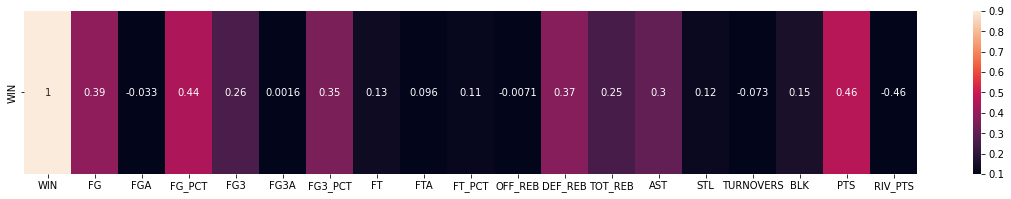

In [19]:
corrperformance = performance.corr()
f, ax = plt.subplots(figsize = (20,3))
sns.heatmap(corrperformance.iloc[:1], vmin = .1, vmax = .9, annot=True,  annot_kws={'size': 10})

In [15]:
corrperformance.iloc[:1]

,WIN,FG,FGA,FG_PCT,FG3,FG3A,FG3_PCT,FT,FTA,FT_PCT,OFF_REB,DEF_REB,TOT_REB,AST,STL,TURNOVERS,BLK,PTS,RIV_PTS
WIN,1.0,0.389159,-0.032695,0.443053,0.258902,0.00155,0.350595,0.131236,0.095511,0.113552,-0.007101,0.369099,0.25075,0.302198,0.124199,-0.072699,0.154103,0.461828,-0.461828


#### Se exportan los datos en formato csv

In [16]:
performance.to_csv('data/performance.csv',index=False)
date_df.to_csv('data/time_dim.csv',index=False)
team_df.to_csv('data/teams.csv',index=False)
corrperformance.iloc[:1].to_csv('data\correlation.csv', index = False)

### Tabla de Hechos

La tabla de hechos Realizada tiene la finalidad de buscar el promedio de las variables requeridas de las variables correlacionadas con la victoria en todos los partidos de la temporada 2022-23 de los Chicago Bulls, de los Brooklyn Nets y de los Denver Nuggets (se usa como un parámetro extra del cual aferrarse al ser los mejores de la temporada), este proceso fue llevado acabo con la herramienta KNIME 

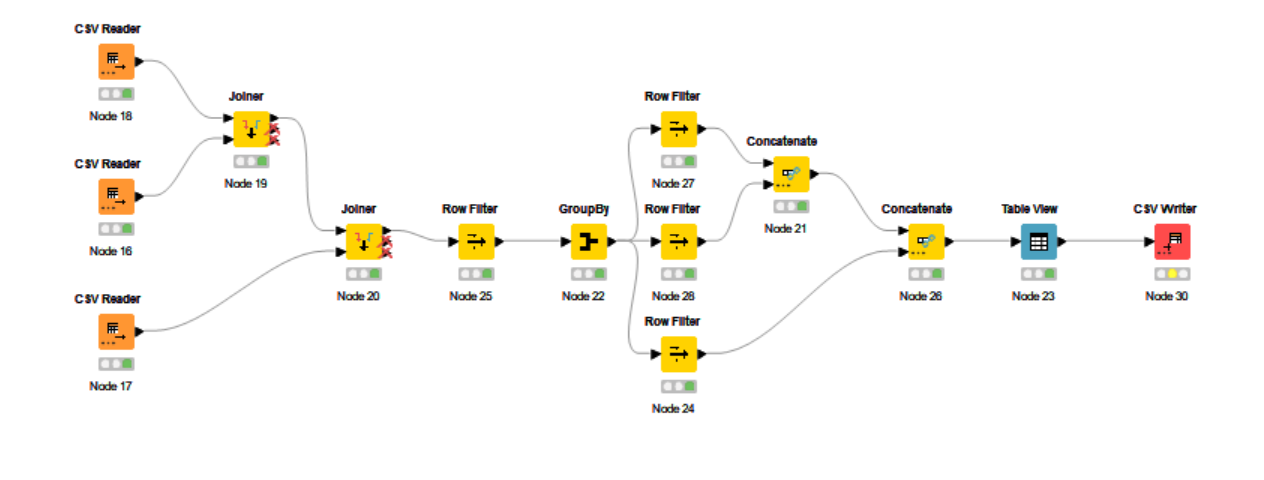

### Resultados

La base de datos contaba con unos 7059 registros de partidos, con 42 columnas, de las cuales solo fueron utilizadas 22, mientras que los registros se duplicaron a 14117 registros al separar los datos de los equipo locales y visitantes y utilizarlos como elementos separados, de los 14117 datos solo fueron utilizados los datos de la temporada 2022-23 para evitar ruido en el resultado de las correlaciones y que sean lo más cercana a la actualidad del Basketball. 
Se ha utilizado un análisis de correlación para diferenciar cuáles variables son las más importantes para ganar los partidos siendo estas los Field Goals de 2 puntos, los Defensive Rebounds, las asistencias y los 3 Points Field Goals.
Apartir de esta informacion, se ha ingresado los datos a Power BI de donde salen los siguientes reportes 

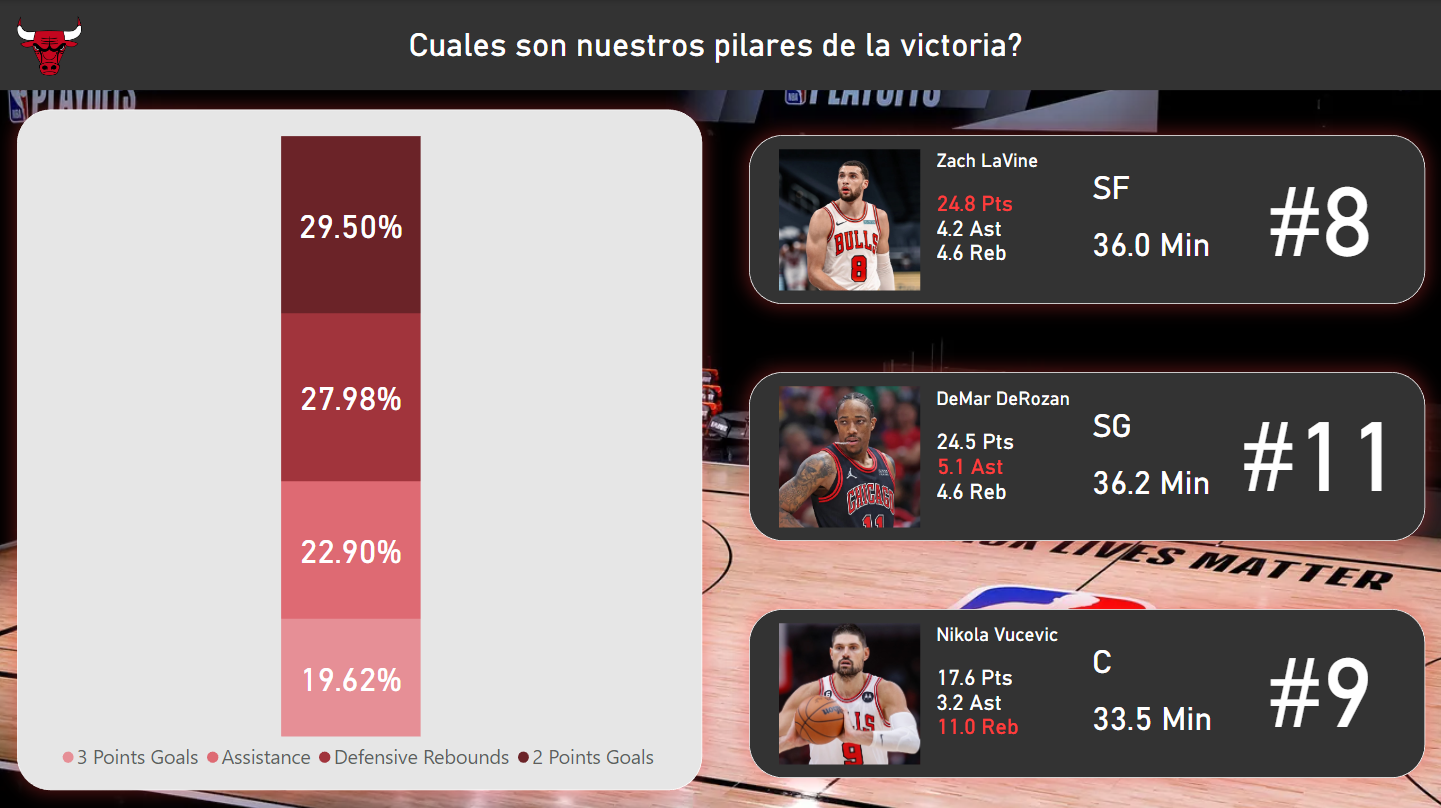

En este reporte se ve cuales son las correlaciones que se tomarán en cuenta para el análisis del equipo, los Field Goals de 2 puntos representando el 29.5% del modelo, Defensive 
Rebounds representando el 27.98%, Assistance 22.9% y 3 points goals 19.62%. Las mayores figuras de los Chicago son Zach LaVine como máximo anotador en promedio con 24.8 puntos, DeMar DeRozan como máximo asistidor con 5.1 asistencias en promedio y Nikola Vucevic como máximo reboteador con 11.0 rebotes en promedio por partido, todos con más de 33 minutos por partido en promedio.


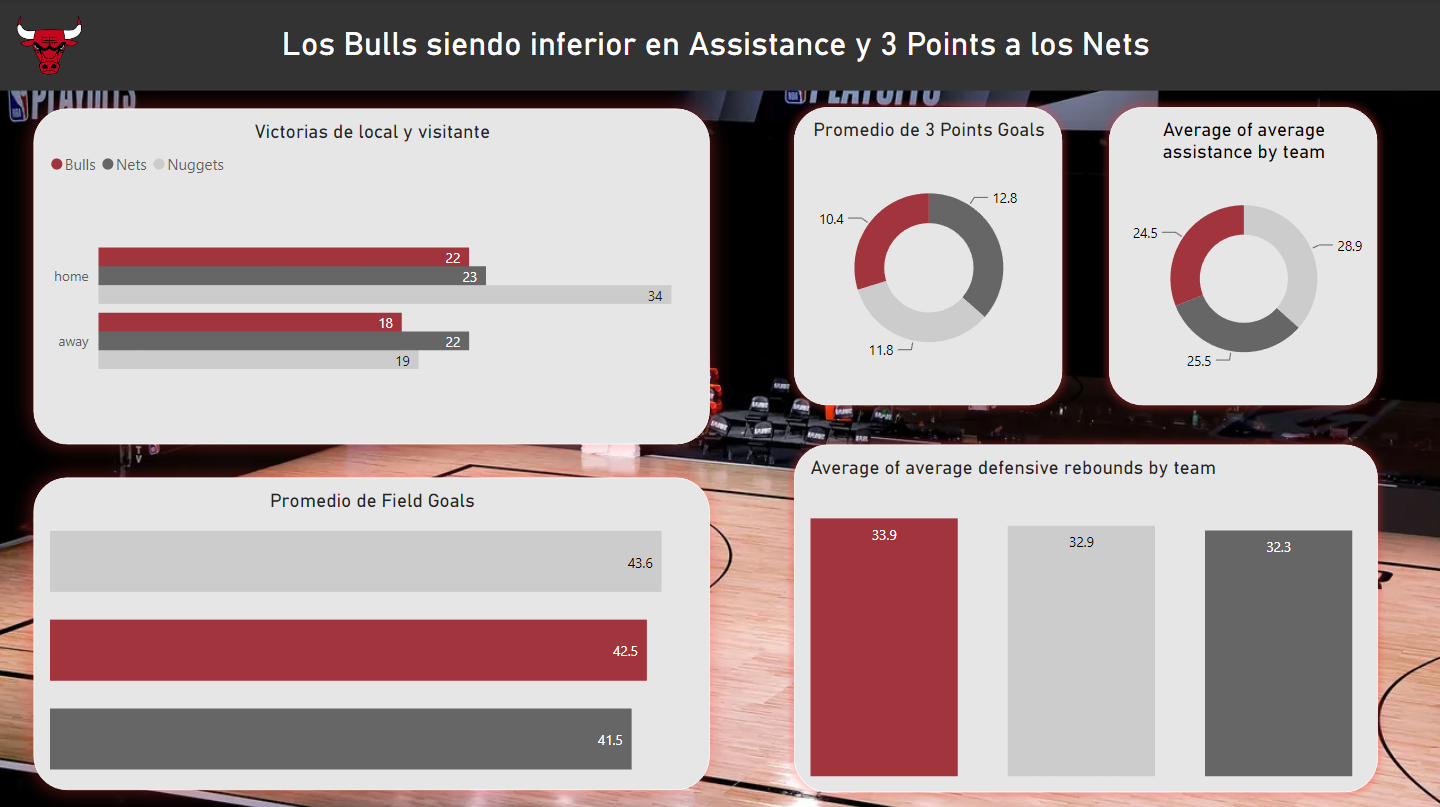

En este reporte se puede observar las estadísticas generales de los Chicago Bulls comparado con los Brooklyn Nets como comparación directa, y teniendo como referencia a los Nuggets para conocer las estadísticas del mejor de la liga y como asemejarse más a ellos, el 
promedio de 2 Points Field Goals se mantiene por arriba de los Nets por 1 Field Goal por partido, también los Defensive Rebounds se encuentra por encima de los Nets por 1.6 rebotes defensivos por partidos e incluso cuentan con mejor promedio que los mejores de la liga por 1 rebote por partido. Por otro lado, los promedios de 3 Points Goals y Asistencias dejan mucho que desear, siendo el promedio de tiros de 3 menor por 2.8 a los Nets, y el promedio de asistencias 1 menos por partido a los Nets y 4.4 asistencias menor a los Denver Nuggets, siendo una diferencia muy grande con los actuales reyes de la liga. 
En este reporte podemos darnos cuenta que necesitamos un jugador capaz tanto de asistir como de hacer triples, siendo los 2 puntos débiles del equipo, por lo que deberíamos buscar un Point Guard o Base, posición caracterizada por crear juego y ser capaz de encestar si la situación lo requiere, ya sea de doble o triple.


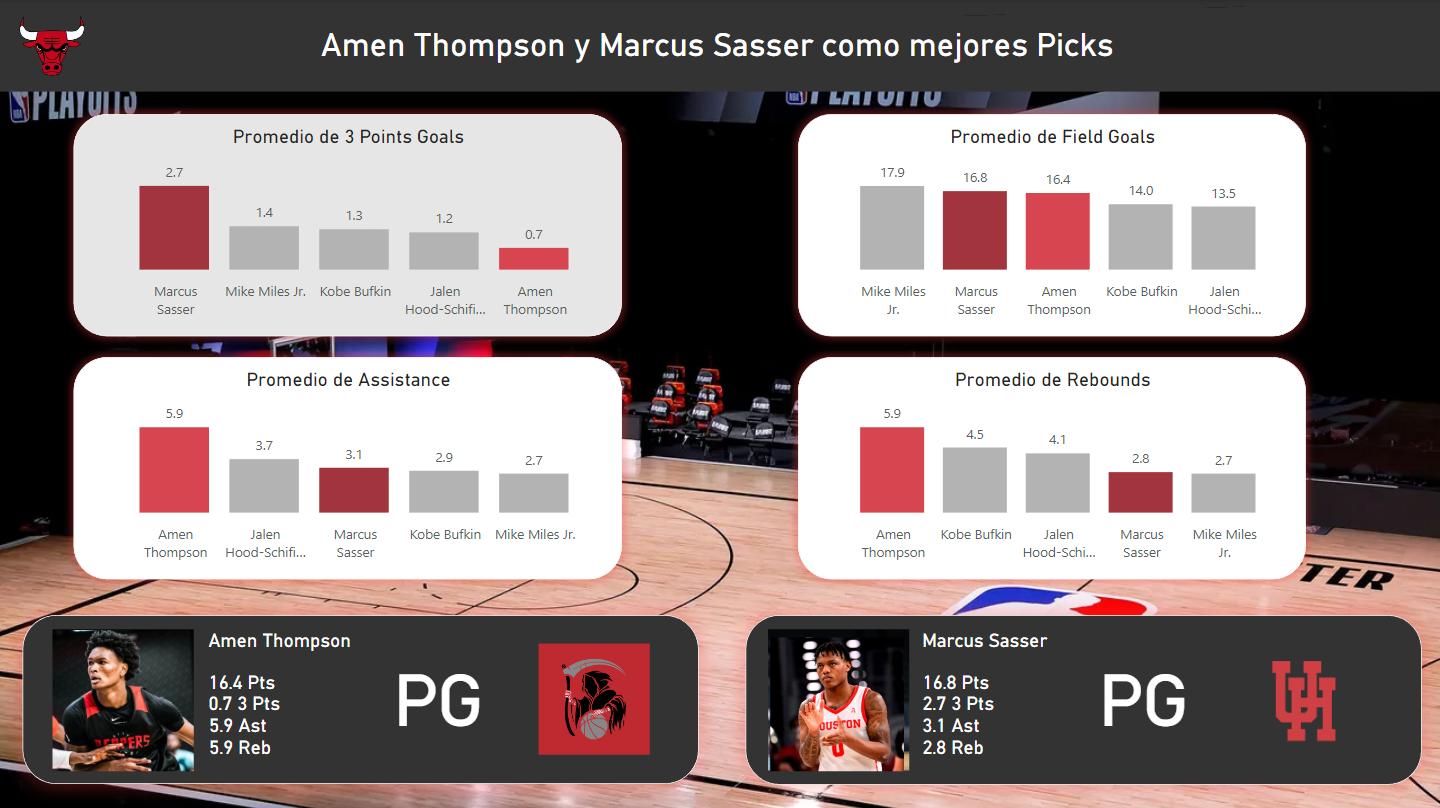

En este reporte tenemos dos posibles candidatos a ser buenos picks para la posición, empezando por Amen Thompson, el máximo asistidor y reboteador entre los Point Guards, promediando 5.9 asistencias, 16.4 puntos de 2 y 5.9 rebotes por partido, pero solo 0.7 triples en promedio, siendo el más bajo del top 5. 
Por otro lado, Marcus Sasser es el mejor anotador entre los top 5 mejores Point Guards, siendo capaz de anotar triples y dobles dependiendo de la situación, el promediando 16.8 puntos de 2, 2.7 puntos de 3, 3.1 asistencias y 2.8 rebotes por partido, siendo el más equilibrado del top 5 Point Guards con mejores estadísticas. 
Al comparar uno con el otro se puede ver claramente que el fichaje de Amen Thompson reforzará tanto la defensa como la construcción del juego en el equipo, por otro lado, el fichaje de Marcus Sasser supondría una potenciación en el ataque del equipo, siendo un excelente triplista y atacante en líneas generales, con un promedio de asistencia bastante decente


### Resultados del análisis 

Tras un análisis exhaustivo de los datos utilizados, podemos decir que la necesidad de un Point Guard por parte de los Chicago Bulls es el problema número uno del equipo, la imposibilidad de crear juego, y las pocas soluciones del equipo en rango de triple, les pasa factura en el marcador final, perdiendo la mitad de sus encuentros disputados en la temporada regular. 
La presentación de la posibilidad de fichar a Amen Thompson o Marcus Sasser son 2 caminos que podrían ayudar al equipo, Amen Thompson apoyando al equipo en la creación de juego por medio de sus asistencias como en la defensa gracias a su gran habilidad como reboteador, por otro lado Marcus Sasser sería un arma ofensiva increíble, creando juego y marcando gracias a su gran capacidad de tiros lejanos y a su capacidad de adentrarse entre los rivales y marcar de a 2. 
En cualquier caso, el fichaje de uno de estos prodigiosos jugadores deberá quedar a manos del cuerpo técnico, ya que en caso de buscar un perfil defensivo, bueno creando jugadas y que sea capaz de anotar, Amen Thompson sería el candidato perfecto, pero si se busca un arma ofensiva capaz de ganar el juego y de marcar de cualquier manera, Marcus Sasser sería la mejor opción.
